# Housekeeping

In [5]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
data = yf.download(['BZ=F', 'CL=F'], start='2023-01-01', end='2024-12-31')

brent_close = data['Close']['BZ=F']
wti_close = data['Close']['CL=F']

df = pd.DataFrame({
    'brent': brent_close,
    'wti': wti_close
}).dropna()

print(df.head())

C:\Users\EWD\AppData\Local\Temp\ipykernel_24764\2470916530.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(['BZ=F', 'CL=F'], start='2023-01-01', end='2024-12-31')
[*********************100%***********************]  2 of 2 completed

                brent        wti
Date                            
2023-01-03  82.099998  76.930000
2023-01-04  77.839996  72.839996
2023-01-05  78.690002  73.669998
2023-01-06  78.570000  73.769997
2023-01-09  79.650002  74.629997


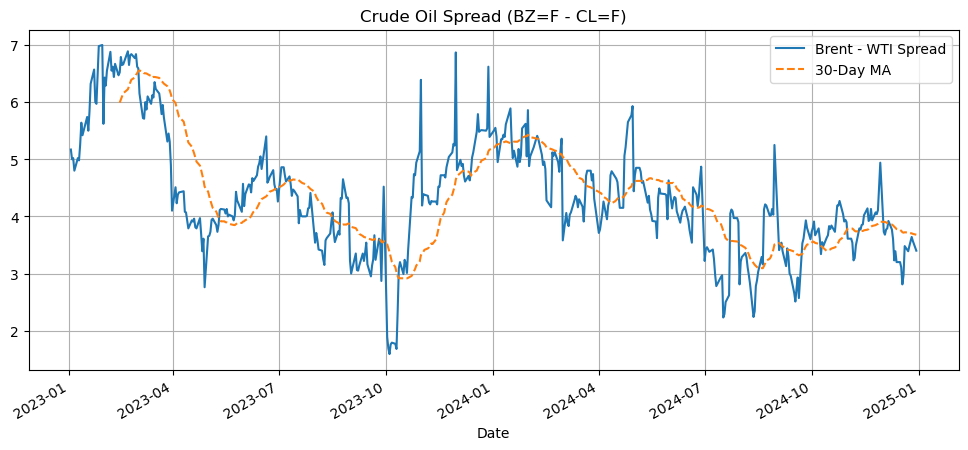

In [23]:
df['spread'] = df['brent'] - df['wti']
df['zscore'] = (df['spread'] - df['spread'].rolling(30).mean()) / df['spread'].rolling(30).std()

# Plot spread
plt.figure(figsize=(12, 5))
df['spread'].plot(label='Brent - WTI Spread')
df['spread'].rolling(30).mean().plot(label='30-Day MA', linestyle='--')
plt.title("Crude Oil Spread (BZ=F - CL=F)")
plt.grid()
plt.legend()
plt.show()

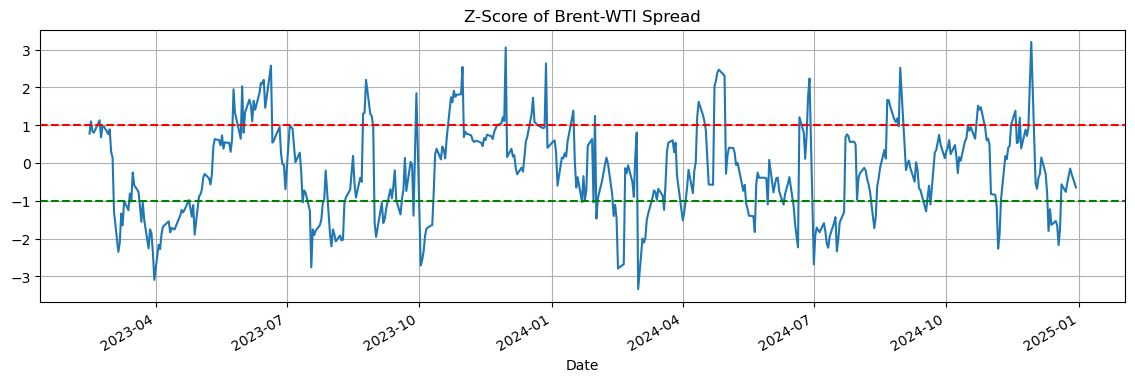

In [24]:
df['zscore'].plot(title='Z-Score of Brent-WTI Spread', figsize=(14,4))
plt.axhline(1, color='r', linestyle='--')
plt.axhline(-1, color='g', linestyle='--')
plt.grid()
plt.show()

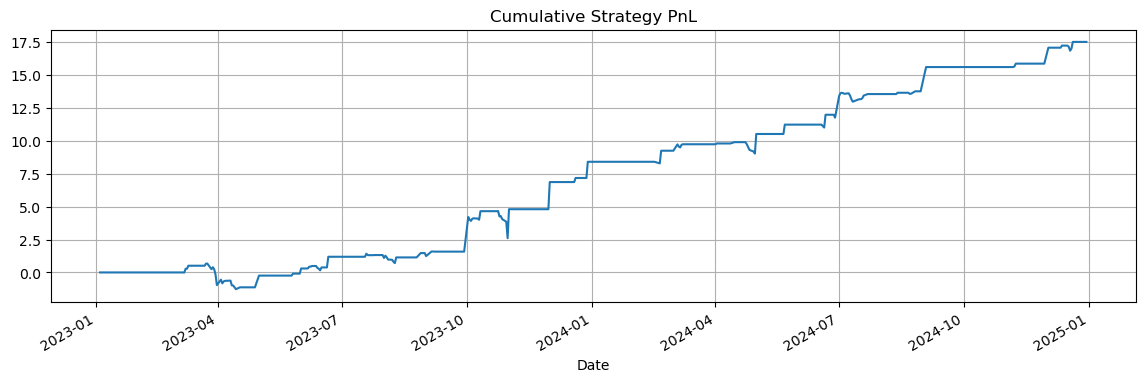

In [25]:
df['position'] = 0
df.loc[df['zscore'] > 1.5, 'position'] = -1  # Short Brent, long WTI
df.loc[df['zscore'] < -1.5, 'position'] = 1  # Long Brent, short WTI

df['position'] = df['position'].shift(1)  # Avoid look-ahead bias

df['spread_return'] = df['spread'].diff()
df['strategy_return'] = df['position'] * df['spread_return']

cumulative = df['strategy_return'].cumsum()

cumulative.plot(title="Cumulative Strategy PnL", figsize=(14, 4))
plt.grid()
plt.show()